## Dataset ##

In [19]:
class ClassDictionary():

    def __init__(self):
        fileClassi = open("classi.txt","r")
        i = 0
        self.classes = {}

        while True:
            riga  = fileClassi.readline()
            if riga == "":
                break
            self.classes[i] = riga.split('\n')[0]
            i +=1
            
    
        fileClassi.close()

    def get(self):
        return self.classes
    
    def IndexList(self):
        return list(self.classes.keys())
    
    def LabelList(self):
        return list(self.classes.values())

In [20]:
cDict = ClassDictionary()
classes = cDict.get()
indexlist = cDict.IndexList()

print(indexlist)
print(cDict.LabelList())
print(classes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['Sala 1', 'Sala 2', 'Sala 3', 'Sala 4', 'Sala 5', 'Sala 6', 'Sala 7', 'Sala 8', 'Sala 9', 'Sala 10', 'Sala 11 ', 'Sala 12', 'Sala 13', 'Cortile degli Stemmi', 'Sala Carrozze', 'Cortile Parisio', 'Biglietteria', 'Portico', 'Scala', 'Loggetta', 'BoxSala', 'Area Sosta']
{0: 'Sala 1', 1: 'Sala 2', 2: 'Sala 3', 3: 'Sala 4', 4: 'Sala 5', 5: 'Sala 6', 6: 'Sala 7', 7: 'Sala 8', 8: 'Sala 9', 9: 'Sala 10', 10: 'Sala 11 ', 11: 'Sala 12', 12: 'Sala 13', 13: 'Cortile degli Stemmi', 14: 'Sala Carrozze', 15: 'Cortile Parisio', 16: 'Biglietteria', 17: 'Portico', 18: 'Scala', 19: 'Loggetta', 20: 'BoxSala', 21: 'Area Sosta'}


In [21]:
import torch
from torch import Tensor
from torchvision import transforms
import numpy as np
import torch

In [22]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path

class ScenesDatabase(Dataset):
    def __init__(self,base_path,txt_list,transform = None, split = "first" , div = 2) :
        
        np.random.seed(5678) 
        torch.random.manual_seed(5678)

        self.base_path = base_path
        self.images = np.loadtxt(txt_list,dtype = str , delimiter= ' ')
        np.random.shuffle(self.images)

        if split != None:
            split_idx = len(self.images) // div
            if split ==  "first":
                self.images = self.images[:split_idx]
            elif split == "second":
                self.images = self.images[split_idx:]
                
        self.transform = transform
        
    def __getitem__(self, index):
        f,c = self.images[index]
        res = f.split('/')

        if res[7] == "":
           f = res[6] + '/' + res[7] + res[8] 
        else:
           f = res[6] + '/' + res[7]
           if res[7].split('.')[1] != "jpg":
            f = f + "jpg"

       #print(self.base_path,f)
  
        im = Image.open(path.join(self.base_path,f))

        if self.transform is not None: 
           im = self.transform(im)

        label = int(c)

        return {'image' : im, 'label':label}
    
    def getLabel(self,index):
        return int(self.images[index][1])

    def __len__(self):
        return int(len(self.images))
       
    



In [23]:
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt')
train_2 = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt' , split = None)
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt', split="first")
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',split = "second") 

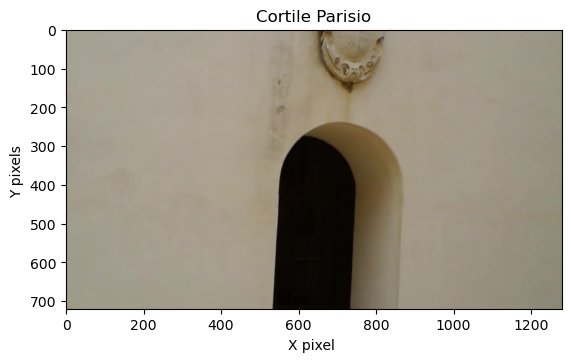

width:  1280  height:  720


In [24]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

sample = train[1]

#print(sample["label"])
 
plt.title(classes[sample["label"]])
plt.xlabel("X pixel ")
plt.ylabel("Y pixels ")

img = sample["image"]
 
#image = mpimg.imread(sample["image"])
plt.imshow(img)
plt.show()
print("width: ",img.width," height: ",img.height)

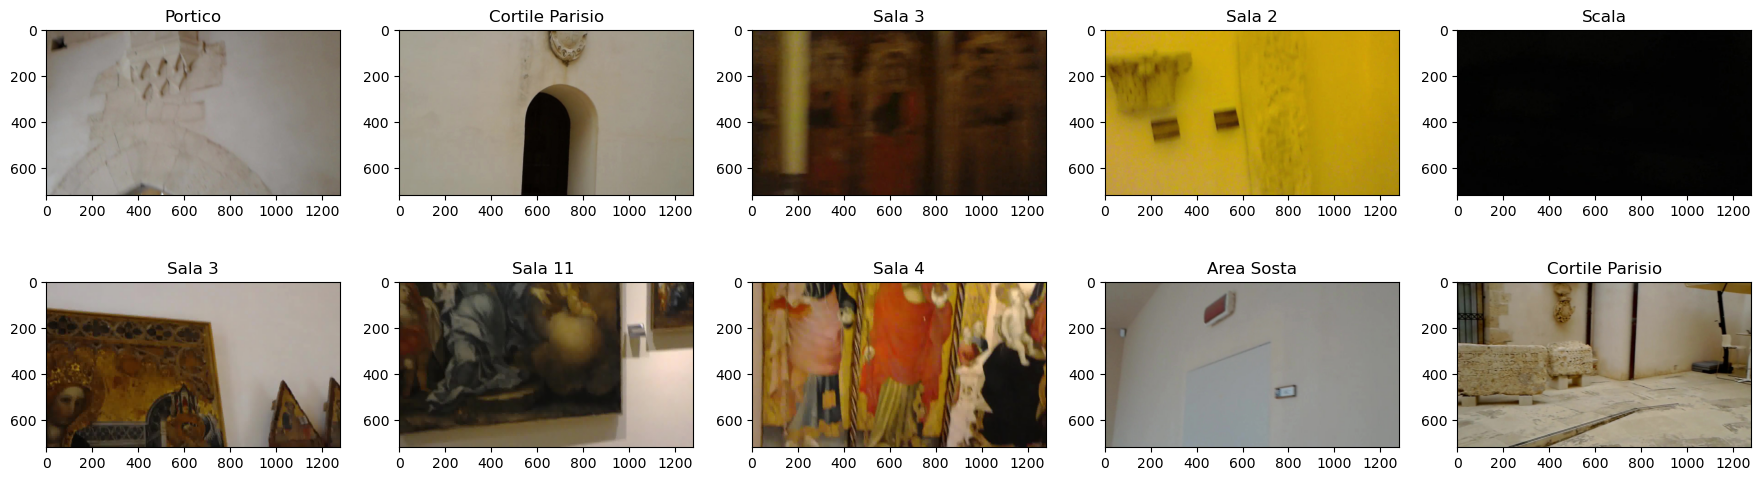

In [25]:
from matplotlib import pyplot as plt

plt.figure(figsize=(22,6)) 

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

In [26]:
def pieChart(dataset):

    indexlist = {i: 0 for i in range(0,22)}

    print("Dimenzione dataset:",len(dataset))

    for i in range(len(dataset)):
        indexlist[dataset.getLabel(i)] += 1

    print("Distribuzione classi:")
    print(indexlist)
    print("Somma distribuzione classi",sum(indexlist.values()) )


    plt.figure(figsize=(10,10))
    plt.pie(indexlist.values(), labels= cDict.LabelList() , autopct='%1.1f%%' )
    #plt.legend(title = "Classi")
    plt.show() 


Dimenzione dataset: 49127
Distribuzione classi:
{0: 1324, 1: 2754, 2: 2899, 3: 4084, 4: 4049, 5: 941, 6: 3691, 7: 2444, 8: 3606, 9: 2044, 10: 2581, 11: 854, 12: 1030, 13: 2007, 14: 1119, 15: 3613, 16: 1443, 17: 2032, 18: 2290, 19: 1459, 20: 1632, 21: 1231}
Somma distribuzione classi 49127


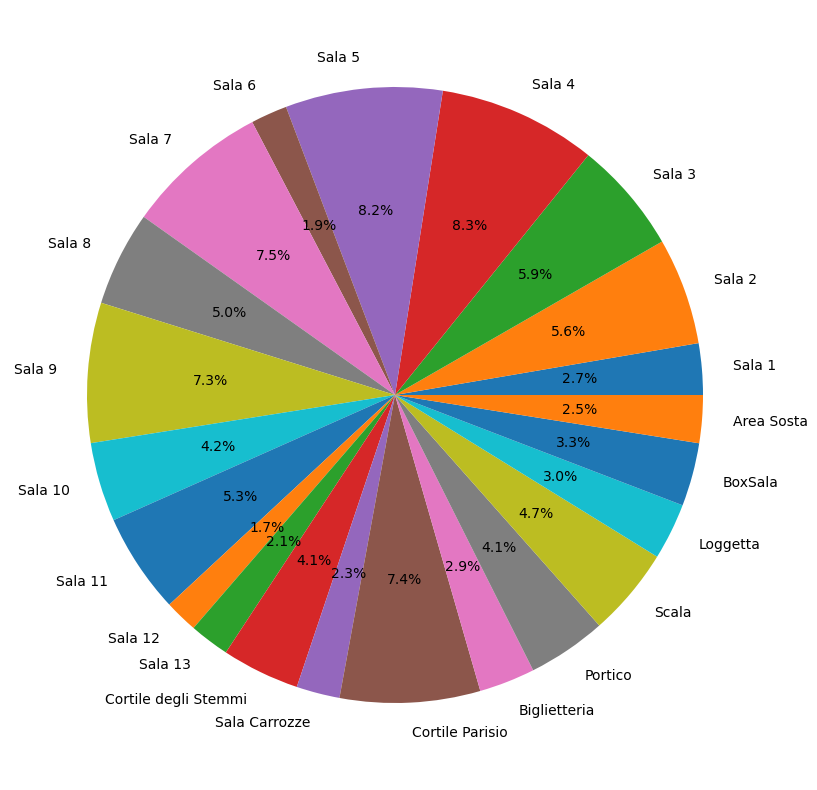

In [27]:
#info training set usato nelle prime 4 prove 
pieChart(train)

Dimenzione dataset: 98255
Distribuzione classi:
{0: 2605, 1: 5578, 2: 5799, 3: 8048, 4: 8076, 5: 1841, 6: 7429, 7: 4837, 8: 7354, 9: 4081, 10: 5140, 11: 1724, 12: 2128, 13: 4097, 14: 2281, 15: 7262, 16: 2869, 17: 3991, 18: 4480, 19: 2919, 20: 3262, 21: 2454}
Somma distribuzione classi 98255


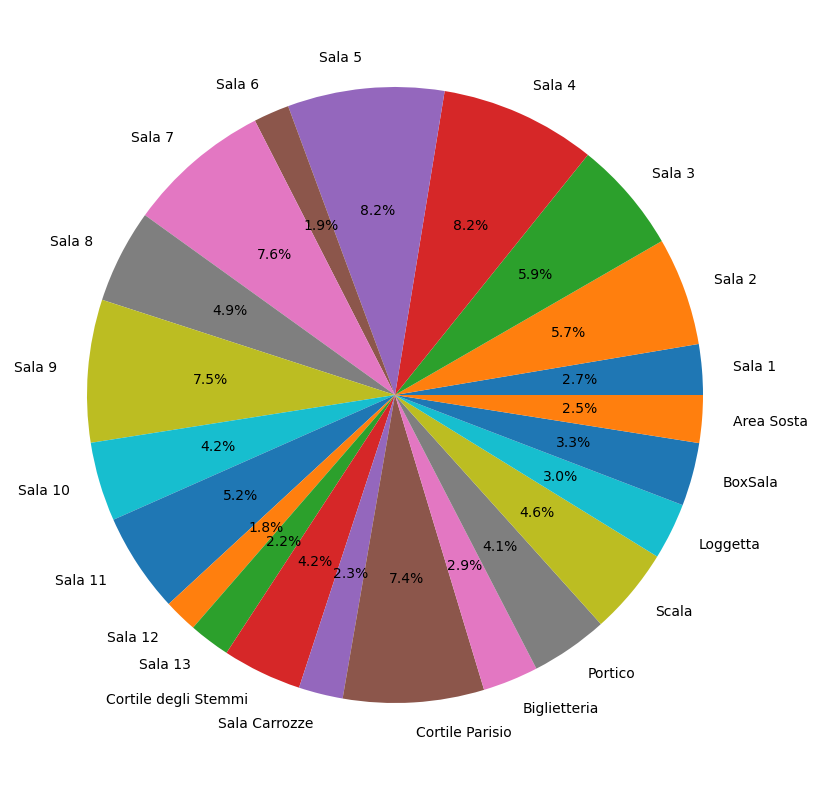

In [28]:
#info training set usato nella quinta prova
pieChart(train_2)

Dimenzione dataset: 21055
Distribuzione classi:
{0: 561, 1: 1173, 2: 1269, 3: 1694, 4: 1753, 5: 402, 6: 1588, 7: 1033, 8: 1553, 9: 867, 10: 1119, 11: 367, 12: 435, 13: 892, 14: 469, 15: 1545, 16: 621, 17: 852, 18: 1000, 19: 630, 20: 719, 21: 513}
Somma distribuzione classi 21055


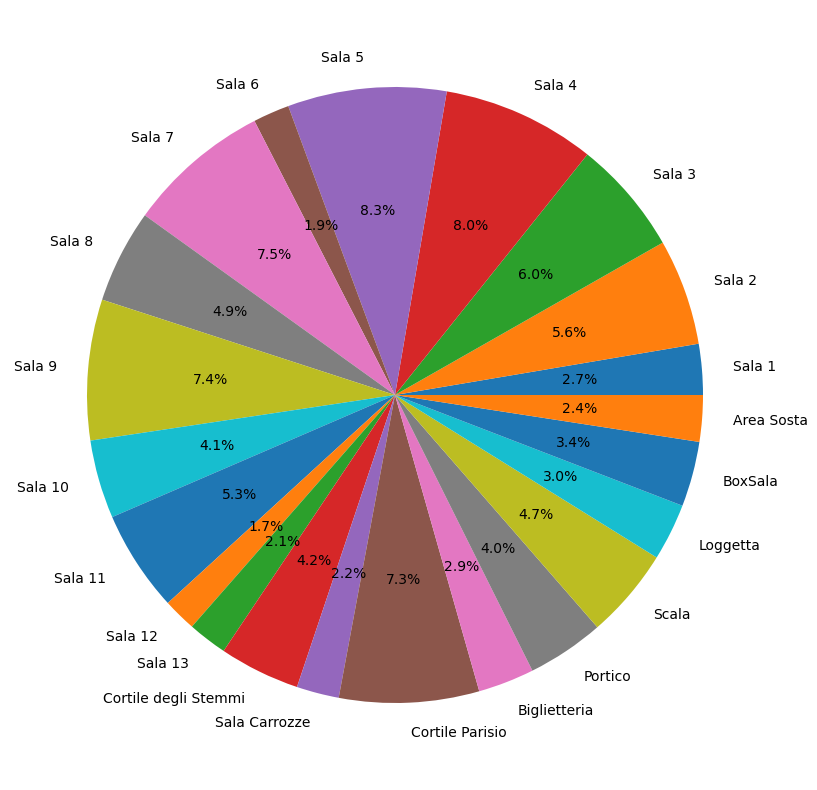

In [29]:
#info test set
pieChart(test)

Dimenzione dataset: 21054
Distribuzione classi:
{0: 555, 1: 1217, 2: 1217, 3: 1755, 4: 1710, 5: 387, 6: 1596, 7: 1040, 8: 1598, 9: 882, 10: 1084, 11: 372, 12: 477, 13: 864, 14: 509, 15: 1567, 16: 609, 17: 858, 18: 919, 19: 620, 20: 680, 21: 538}
Somma distribuzione classi 21054


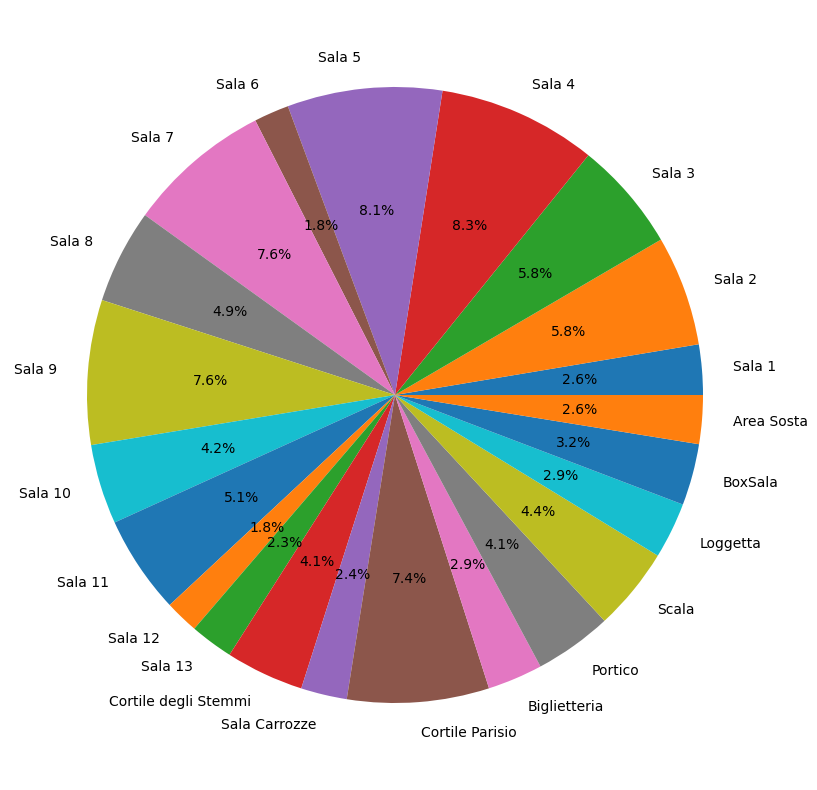

In [30]:
#info validation set
pieChart(validation)

In [31]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
valisation_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img,title):
    # Convert from tensor image
    img = img.numpy().transpose((1, 2, 0))
    img = s * img + m  # Using the provided normalization values to unnormalize
    img = np.clip(img, 0, 1)
    
    plt.title(title)
    plt.imshow(img)

def showimage_from_loader(loader,classes):
    dataiter = iter(loader)
    batch = next(dataiter)
    images = batch['image']
    labels = batch['label']

    fig = plt.figure(figsize=(20, 10))

    for idx in range(40):
        ax = fig.add_subplot(5, 8, idx+1, xticks=[], yticks=[])
        imshow(images[idx],classes[labels[idx].item()])
        

    plt.show()

## Fine-tuning ##

### Resnet-18 ###

In [33]:
import torchvision.models as models

model = models.resnet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [34]:
#rendiamo le immagini compatibili con il nuovo modello 

transform = transforms.Compose([transforms.Resize([256]), transforms.CenterCrop([224])])
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform) 

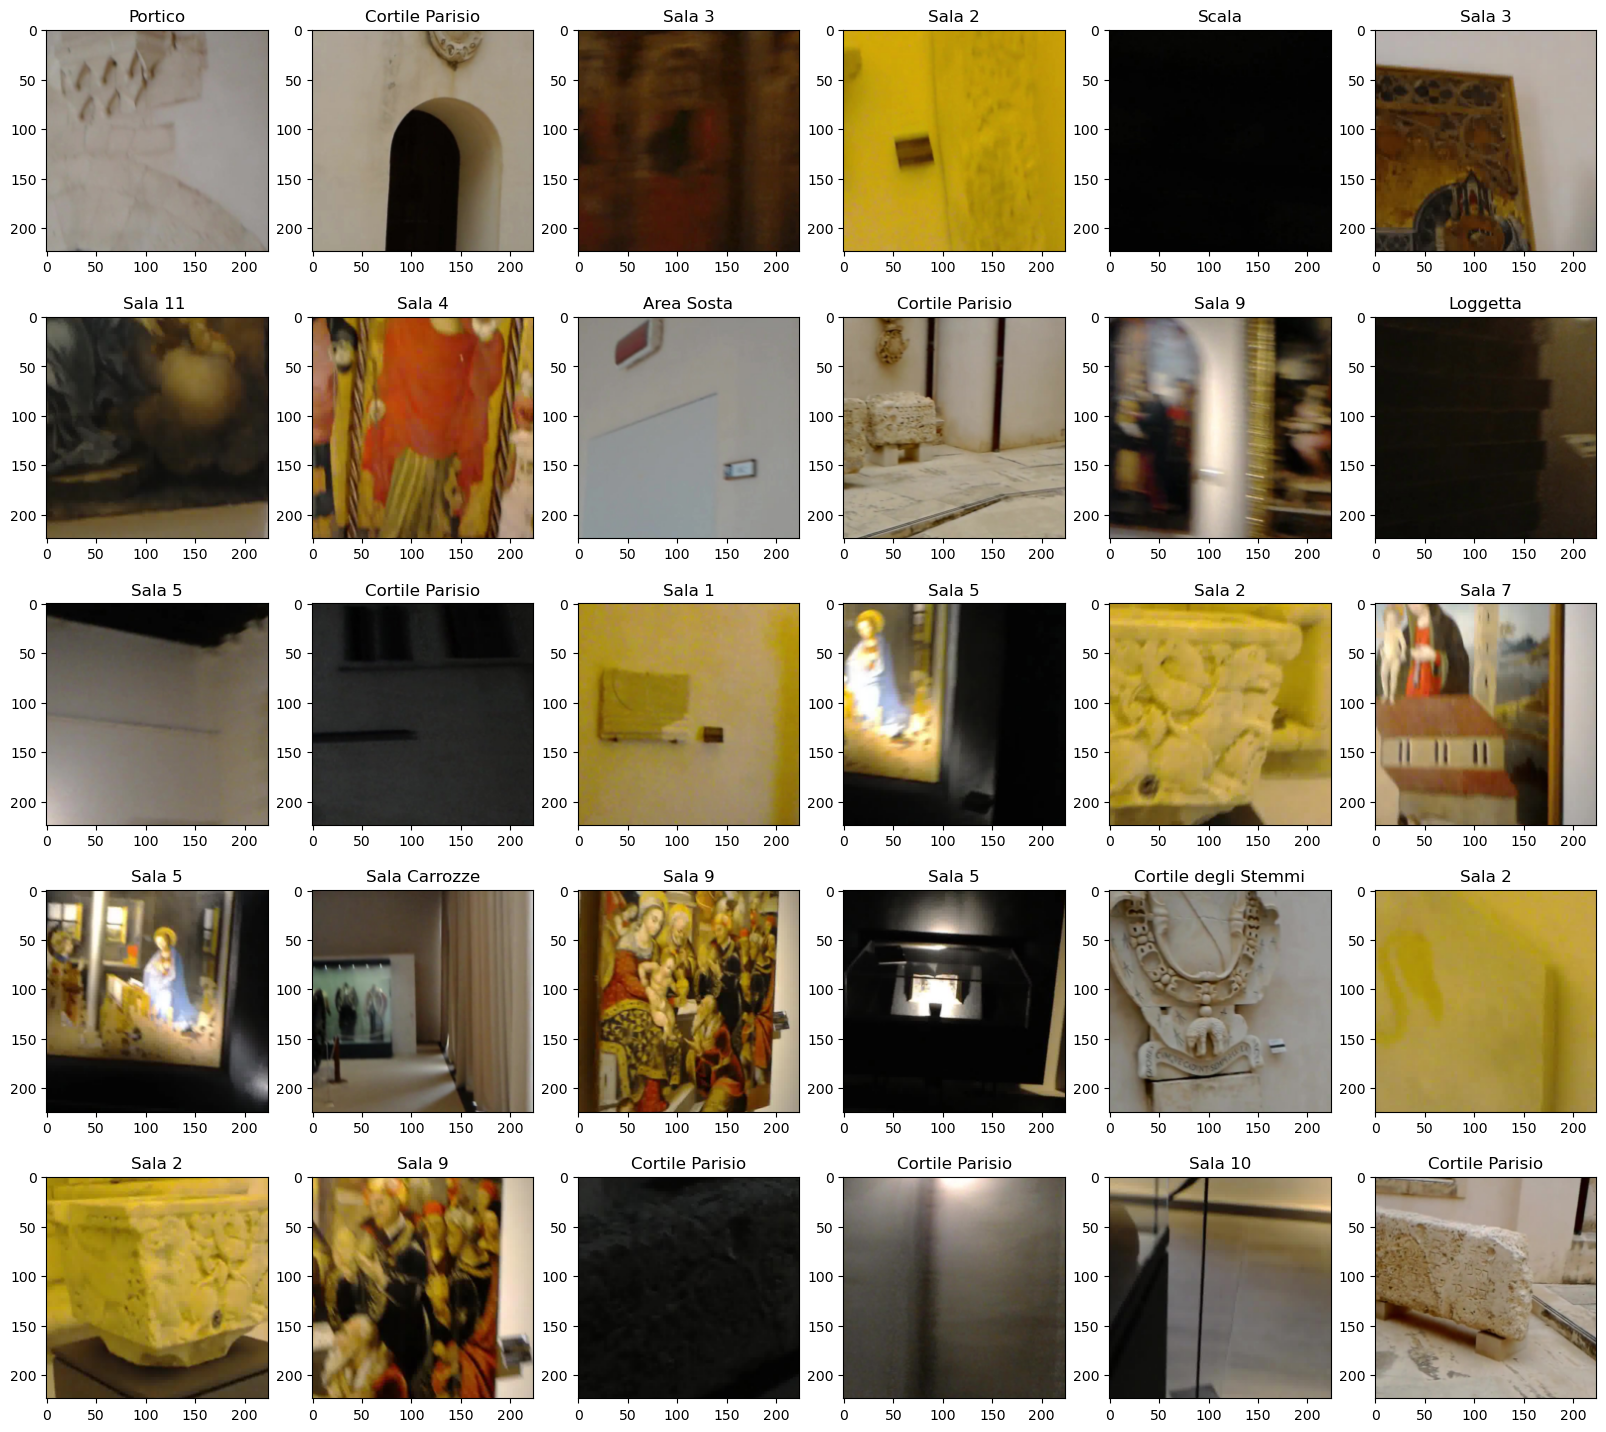

In [35]:
plt.figure(figsize=(20,18)) 

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

In [36]:
from torch import nn
import torchvision.models as models
from torchvision.models.resnet import ResNet18_Weights

class BellomoClassifier(nn.Module):

    def __init__(self):
        super(BellomoClassifier, self).__init__()

        #self.resnet = models.resnet18(pretrained = True)
        self.resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.features = nn.Sequential(*list(list(self.resnet.children())[:-1])) #rimozione ultimo livello
        self.flatten = nn.Flatten()
        
        # Classificatore
        self.fc = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256,22)
        )


    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata 
        x = self.features(x)
        x = self.flatten(x)
        #x = self.fc(x.view(x.shape[0],-1))
        x = self.fc(x) 
        return x

## Prima prova ##

Adattiamo le immaggini ai modello resnet

In [80]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [81]:
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform=transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform=transform) 

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
validation_loader = DataLoader(validation, batch_size=100, num_workers=0 , drop_last= True)

In [82]:
for batch in train_loader: 
    break

print(batch["image"].shape)
print(batch["label"].shape)

torch.Size([100, 3, 224, 224])
torch.Size([100])


In [83]:
net = BellomoClassifier()
#total_params = sum(p.numel() for p in net.parameters())
num_parameters =0
num_parameters += sum(p.numel() for p in net.features.parameters())
num_parameters += sum(p.numel() for p in net.fc.parameters())
print("#parametri modello:",num_parameters)

#parametri modello: 11313494


In [84]:
class AverageValueMeter(): 
    
    def __init__(self): 
        self.reset()

    def reset(self): 
        self.sum = 0 
        self.num = 0

    def add(self, value, num): 
        self.sum += value*num 
        self.num += num

    def value(self): 
        try:
            return self.sum/self.num 
        except:
            return None

In [85]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum) 
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x,y = batch
                    x= batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

KeyboardInterrupt: 

no augmentation - no regolarizzazione - lr 0.01

In [ ]:
net = BellomoClassifier() 
net = train_classifier(net, train_loader, validation_loader,'weight/BellomoClassifier',logdir='logs/BellomoClassifier/NoAugmentation', epochs=15)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier",15)))
net = train_classifier(net, train_loader, validation_loader,'weight/BellomoClassifier',logdir='logs/BellomoClassifier/NoAugmentation', start_epochs=15 , epochs= 30)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


## Data augmentation ##

In [39]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

train_transform = transforms.Compose([
    transforms.Resize(300,), #Video Acquisition: 1280x720 at 29.97 fps
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m, s)
])
test_transform = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [40]:
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',train_transform) 

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
validation_loader = DataLoader(validation, batch_size=100, num_workers=0 , drop_last= True)

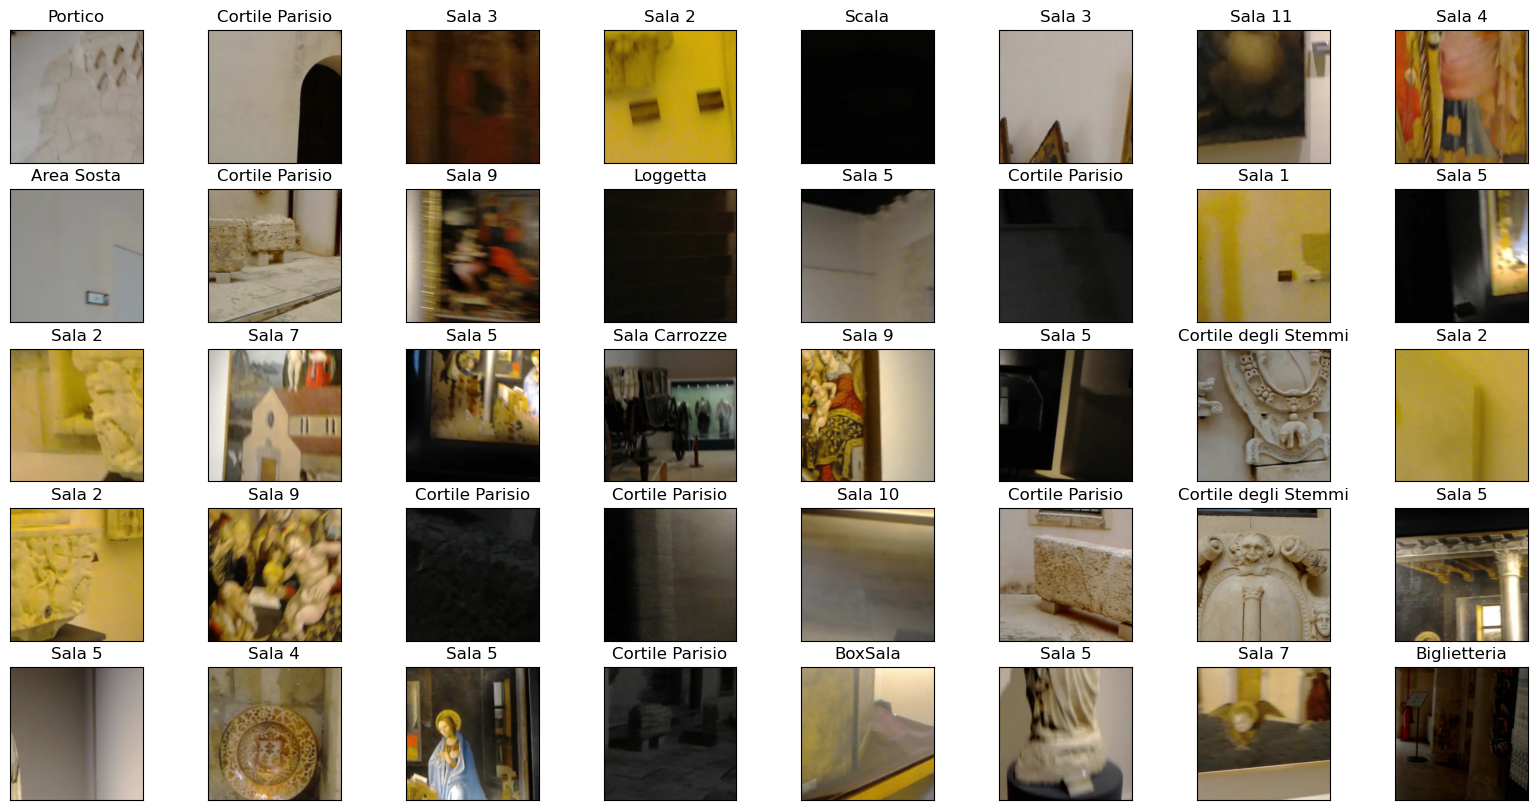

In [41]:
showimage_from_loader(train_loader,classes=ClassDictionary().get())

## Regolarizzazione ##

In [42]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

class AverageValueMeter(): 
    
    def __init__(self): 
        self.reset()

    def reset(self): 
        self.sum = 0 
        self.num = 0

    def add(self, value, num): 
        self.sum += value*num 
        self.num += num

    def value(self): 
        try:
            return self.sum/self.num 
        except:
            return None


def train_classifier_r(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0, weight_decay = 1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum , weight_decay = weight_decay) #aggiungo regolarizazione
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x=batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

## Seconda prova ##

In [ ]:
net = BellomoClassifier() 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a', epochs=15 , logdir= "logs/BellomoClassifier-r/A-r(1e-3)-lr(0.01)", weight_decay= 1e-3)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a",15)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a', start_epochs=15, epochs=30 , logdir= "logs/BellomoClassifier-r/A-r(1e-3)-lr(0.01)", weight_decay= 1e-3)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


## Terza prova ##

In [ ]:
net = BellomoClassifier() 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', epochs=15 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",15)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=15, epochs=30 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",30)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=30, epochs=40 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 31
start new epochs 32
start new epochs 33
start new epochs 34
start new epochs 35
start new epochs 36
start new epochs 37
start new epochs 38
start new epochs 39
start new epochs 40


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",40)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=40, epochs=50 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)/lr(0.001)", weight_decay= 1e-2, lr = 0.001)

device: cuda
start new epochs 41
start new epochs 42
start new epochs 43
start new epochs 44
start new epochs 45
start new epochs 46
start new epochs 47
start new epochs 48
start new epochs 49
start new epochs 50


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",50)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=50, epochs=65 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)/lr(0.001)", weight_decay= 1e-2, lr = 0.001)

device: cuda
start new epochs 51
start new epochs 52
start new epochs 53
start new epochs 54
start new epochs 55
start new epochs 56
start new epochs 57
start new epochs 58
start new epochs 59
start new epochs 60
start new epochs 61
start new epochs 62
start new epochs 63
start new epochs 64
start new epochs 65


## Altri metodi per la valutazione ##

In [23]:
def test_classifier(model, loader):

    device = "cuda" if torch.cuda.is_available() else "cpu"

    model.to(device)

    predictions, labels = [], []

    for batch in loader:

        x = batch["image"].to(device)

        y = batch["label"].to(device)

        output = model(x)

        preds = output.to('cpu').max(1)[1].numpy()

        labs = y.to('cpu').numpy()

        predictions.extend(list(preds))

        labels.extend(list(labs))

    return np.array(predictions), np.array(labels)

In [45]:
from sklearn.metrics import f1_score

def f1_score_train_test(test_loader,train_loader,model):

    resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
    resnet_finetuned_predictions_train, labels_train = test_classifier(net,train_loader)
    
    scores_training = f1_score(labels_train,resnet_finetuned_predictions_train, average=None)
    scores_testing = f1_score(labels_test,resnet_finetuned_predictions_test, average=None)

    print("F1 score in traning",scores_training)
    print("F1 score in test",scores_testing)

    print("F1 score mean in traning",scores_training.mean())
    print("F1 score mean in test",scores_testing.mean())




## Valutazione terza prova ##  

In [ ]:
net = BellomoClassifier().eval() #disattivo dropout
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",65)))
    
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

f1_score_train_test(test_loader=test_loader,train_loader=train_loader,model=net)

F1 score in traning [0.27650341 0.84586076 0.33043134 0.23451419 0.58431686 0.
 0.26726988 0.41456927 0.34661872 0.33695052 0.33239437 0.
 0.23652174 0.36689991 0.17021277 0.53962853 0.29049587 0.
 0.54471931 0.23910483 0.31072125 0.        ]
F1 score in test [0.29069767 0.84496753 0.32927379 0.26433915 0.62054309 0.
 0.29653505 0.4274571  0.35421533 0.35174547 0.34470536 0.
 0.26086957 0.36484687 0.19379845 0.54661152 0.29718876 0.
 0.5643897  0.24050166 0.37431558 0.        ]
F1 score mean in traning 0.3030787961860583
F1 score mean in test 0.31668189346350634


In [25]:
net = BellomoClassifier().eval() #disattivo dropout
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",65)))
    
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))

Accuracy di resnet su Bellomo dataset (test set): 39.98%


## Quarta prova ##

 ### Bilanciamento distribuzione classi ###

In [ ]:
from torch.utils.data import WeightedRandomSampler

def get_class_weights(indexlist):
    total_samples = sum(indexlist.values())
    num_classes = len(indexlist)
    class_weights = {k: total_samples / (num_classes * v) for k, v in indexlist.items()}
    return class_weights

In [ ]:
indexlist = {i: 0 for i in range(0,22)}
print(len(train))

for i in range(len(train)):
    indexlist[train.getLabel(i)] += 1

#print(sum(indexlist.values()))
print(indexlist)

class_weights = get_class_weights(indexlist)

# pesi per ogni campione nel dataset 
sample_weights = [class_weights[train.getLabel(idx)] for idx in range(len(train))]

sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train), replacement=True)
train_loader = DataLoader(train, batch_size=100, sampler=sampler)

49127
{0: 1324, 1: 2754, 2: 2899, 3: 4084, 4: 4049, 5: 941, 6: 3691, 7: 2444, 8: 3606, 9: 2044, 10: 2581, 11: 854, 12: 1030, 13: 2007, 14: 1119, 15: 3613, 16: 1443, 17: 2032, 18: 2290, 19: 1459, 20: 1632, 21: 1231}


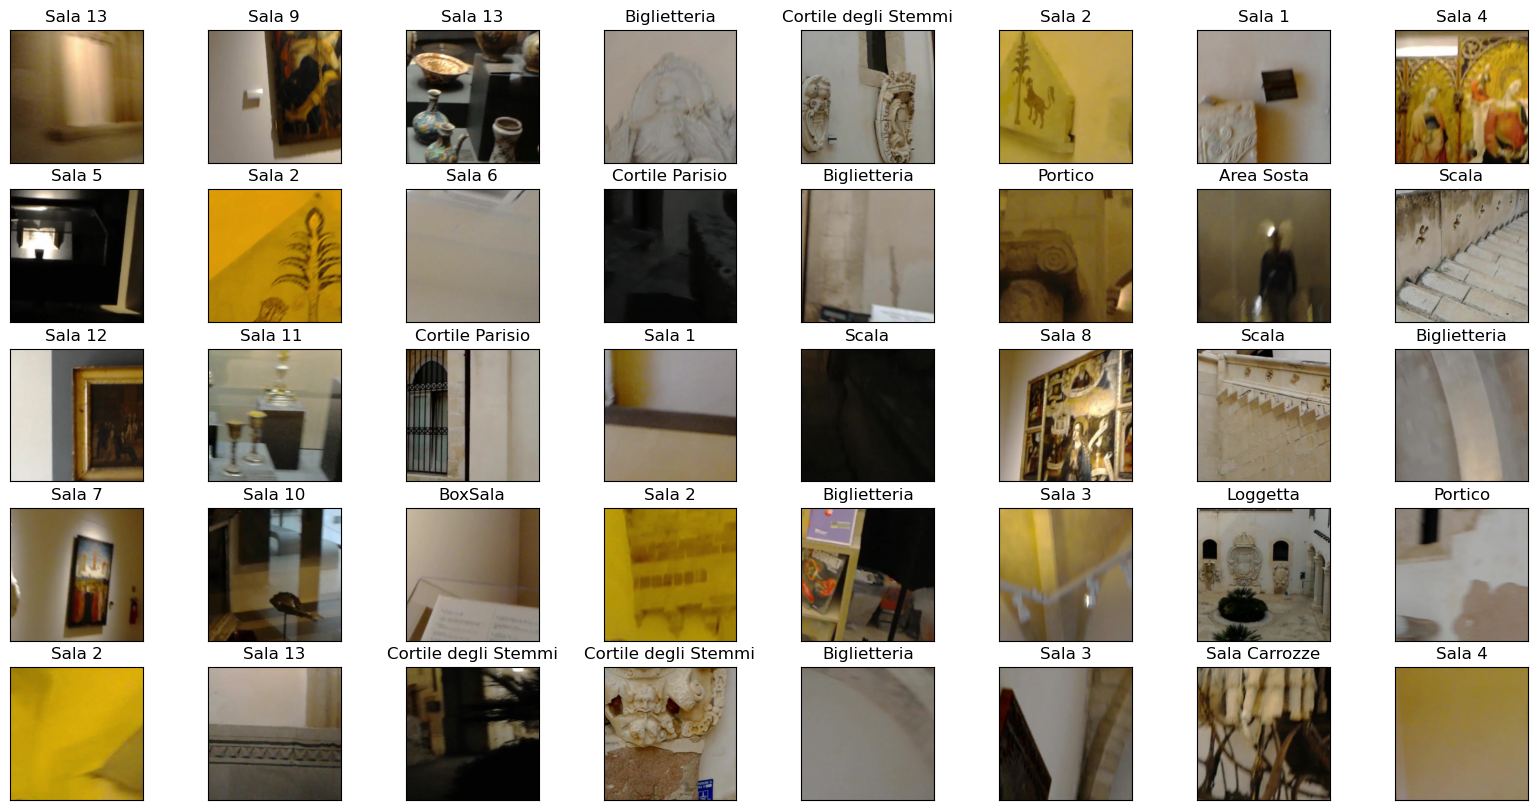

In [ ]:
showimage_from_loader(train_loader,classes= classes)

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(loader, class_names):
    # Inizializza un contatore per tutte le classi
    class_counts = [0] * len(class_names)

    # Itera attraverso il loader e conta le occorrenze di ciascuna classe
    for batch in loader:
        labels = batch['label']
        for label in labels:
            class_counts[label] += 1

    # Visualizza il grafico a torta
    plt.figure(figsize=(10, 10))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
    plt.show()

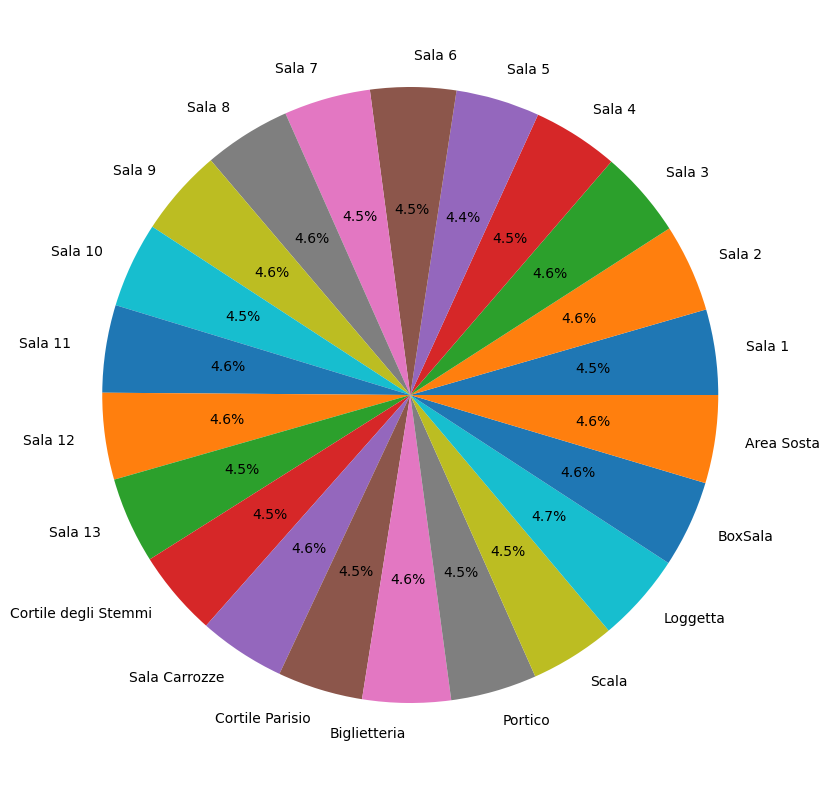

In [ ]:
plot_class_distribution(train_loader, cDict.LabelList())

### Training quarta prova ###

In [ ]:
net = BellomoClassifier()
net = train_classifier_r(net, train_loader, validation_loader ,'weight/BellomoClassifier-b(1e-3)', epochs=15 , logdir= "logs/BellomoClassifier-b(1e-3)/" , lr= 0.01 ,weight_decay=  1e-3)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [ ]:
net = BellomoClassifier()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-b(1e-3)",15)))
net = train_classifier_r(net, train_loader, validation_loader ,'weight/BellomoClassifier-b(1e-3)', start_epochs=15, epochs=30 , logdir= "logs/BellomoClassifier-b(1e-3)/" , lr= 0.001 ,weight_decay=  1e-3)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


In [ ]:
net = BellomoClassifier()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-b(1e-3)",30)))
net = train_classifier_r(net, train_loader, validation_loader ,'weight/BellomoClassifier-b(1e-3)', start_epochs=30, epochs=45 , logdir= "logs/BellomoClassifier-b(1e-3)/" , lr= 0.001 ,weight_decay=  1e-3)

device: cuda
start new epochs 31
start new epochs 32
start new epochs 33
start new epochs 34
start new epochs 35
start new epochs 36
start new epochs 37
start new epochs 38
start new epochs 39
start new epochs 40
start new epochs 41
start new epochs 42
start new epochs 43
start new epochs 44
start new epochs 45


### Valutazione quarta prova ###

In [ ]:
net = BellomoClassifier().eval() #disattivo dropout
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-b(1e-3)",45)))
    
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

f1_score_train_test(test_loader=test_loader,train_loader=train_loader,model=net)

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))

F1 score in traning [0.26599569 0.81479227 0.00344353 0.00876126 0.29521057 0.20646102
 0.21606519 0.1976876  0.01957154 0.24267127 0.         0.0605013
 0.18589393 0.21995927 0.40883281 0.         0.13592233 0.
 0.36197353 0.07801858 0.00122549 0.29842382]
F1 score in test [0.22857143 0.79986029 0.00314713 0.00705882 0.30601611 0.19509412
 0.29548989 0.19825592 0.00873362 0.24735883 0.         0.05919662
 0.17886179 0.2462845  0.47147147 0.         0.16262482 0.
 0.35820896 0.05007364 0.         0.29496403]
F1 score mean in traning 0.1827914073974613
F1 score mean in test 0.18687599937993526
Accuracy di resnet su Bellomo dataset (test set): 23.66%


## Quinta prova ##

### Training quinta prova ###

In [41]:
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',train_transform, split = None) 
train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True)

In [24]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",60))) #modello pre allenato con i parametri ottenuti nella terza prova 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-5',  epochs=15 , logdir= "logs/BellomoClassifier-5", weight_decay= 1e-2)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [24]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-5",15))) 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-5',  start_epochs = 15 , epochs=30 , logdir= "logs/BellomoClassifier-5", weight_decay= 1e-2)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


In [42]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-5",30))) 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-5',  start_epochs = 30 , epochs= 45 , logdir= "logs/BellomoClassifier-5", weight_decay= 5e-2, lr= 0.001)

device: cuda
start new epochs 31
start new epochs 32
start new epochs 33
start new epochs 34
start new epochs 35
start new epochs 36
start new epochs 37
start new epochs 38
start new epochs 39
start new epochs 40
start new epochs 41
start new epochs 42
start new epochs 43
start new epochs 44
start new epochs 45


### Valutazione quinta prova ###

In [46]:
net = BellomoClassifier().eval() #disattivo dropout
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-5",45)))
    
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

f1_score_train_test(test_loader=test_loader,train_loader=train_loader,model=net)

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))

F1 score in traning [0.48611595 0.71625784 0.37795872 0.50004975 0.6858376  0.
 0.48415609 0.24669749 0.49250508 0.3379749  0.42412782 0.
 0.01768264 0.43819939 0.14929006 0.65105492 0.37718849 0.17018182
 0.58643202 0.35751219 0.33180873 0.16413793]
F1 score in test [0.48179272 0.76300578 0.38396747 0.48663468 0.70569867 0.
 0.47648205 0.24960754 0.52353823 0.38251366 0.44103463 0.
 0.0361991  0.40435281 0.18323587 0.6645525  0.38804458 0.14422242
 0.59602076 0.35231788 0.31761309 0.15202703]
F1 score mean in traning 0.3634167929861226
F1 score mean in test 0.3696755207126828
Accuracy di resnet su Bellomo dataset (test set): 47.05%


## Demo ##

In [49]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [50]:
from torch.utils.data import DataLoader

def transform_input(Dataset):
    loader = DataLoader(Dataset, batch_size=100, num_workers=0 , drop_last= True, shuffle= True) 
    return loader

In [51]:
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = transform_input(test)

In [52]:
def Demo(loader,q):
    i=0
    c=0
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = BellomoClassifier().eval()
    model.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-5",45), map_location=torch.device(device)))

    model.to(device)
    classes = cDict.get()
    
    for batch in loader:

        images = batch['image']
        labels = batch['label']

        x = batch["image"].to(device)
        y = batch["label"].to(device)

        output = model(x)
        
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
               
        print(classes[preds[0]] ,classes[labs[0]])
        if classes[preds[0]] == classes[labs[0]]:
            print("corretto")
            c+=1

        if i == q: 
            print("etichette corrette:",c)
            break

        i+=1
    
    return

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def Demo(loader, q):
    i = 0
    c = 0
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = BellomoClassifier().eval()
    model.load_state_dict(torch.load('%s-%d.pth' % ("weight/BellomoClassifier-5", 45), map_location=torch.device(device)))
    model.to(device)
    
    classes = cDict.get()

    # Calcolo delle dimensioni della griglia
    rows = int(np.ceil(np.sqrt(q)))
    cols = int(np.ceil(q / rows))
    fig = plt.figure(figsize=(15, 15))

    for batch in loader:
        images = batch['image']
        labels = batch['label']

        x = images.to(device)
        y = labels.to(device)

        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()

        # Visualizzare l'immagine
        img = np.transpose(images[0].numpy(), (1, 2, 0))

        img = s * img + m 
        img = np.clip(img, 0, 1)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.set_title(f"Predicted: {classes[preds[0]]}\nOriginal: {classes[labs[0]]}")
        ax.axis('off')

        if classes[preds[0]] == classes[labs[0]]:
            c += 1

        if i == q - 1:
            plt.tight_layout()
            plt.show()
            print("etichette corrette:", c)
            break

        i += 1


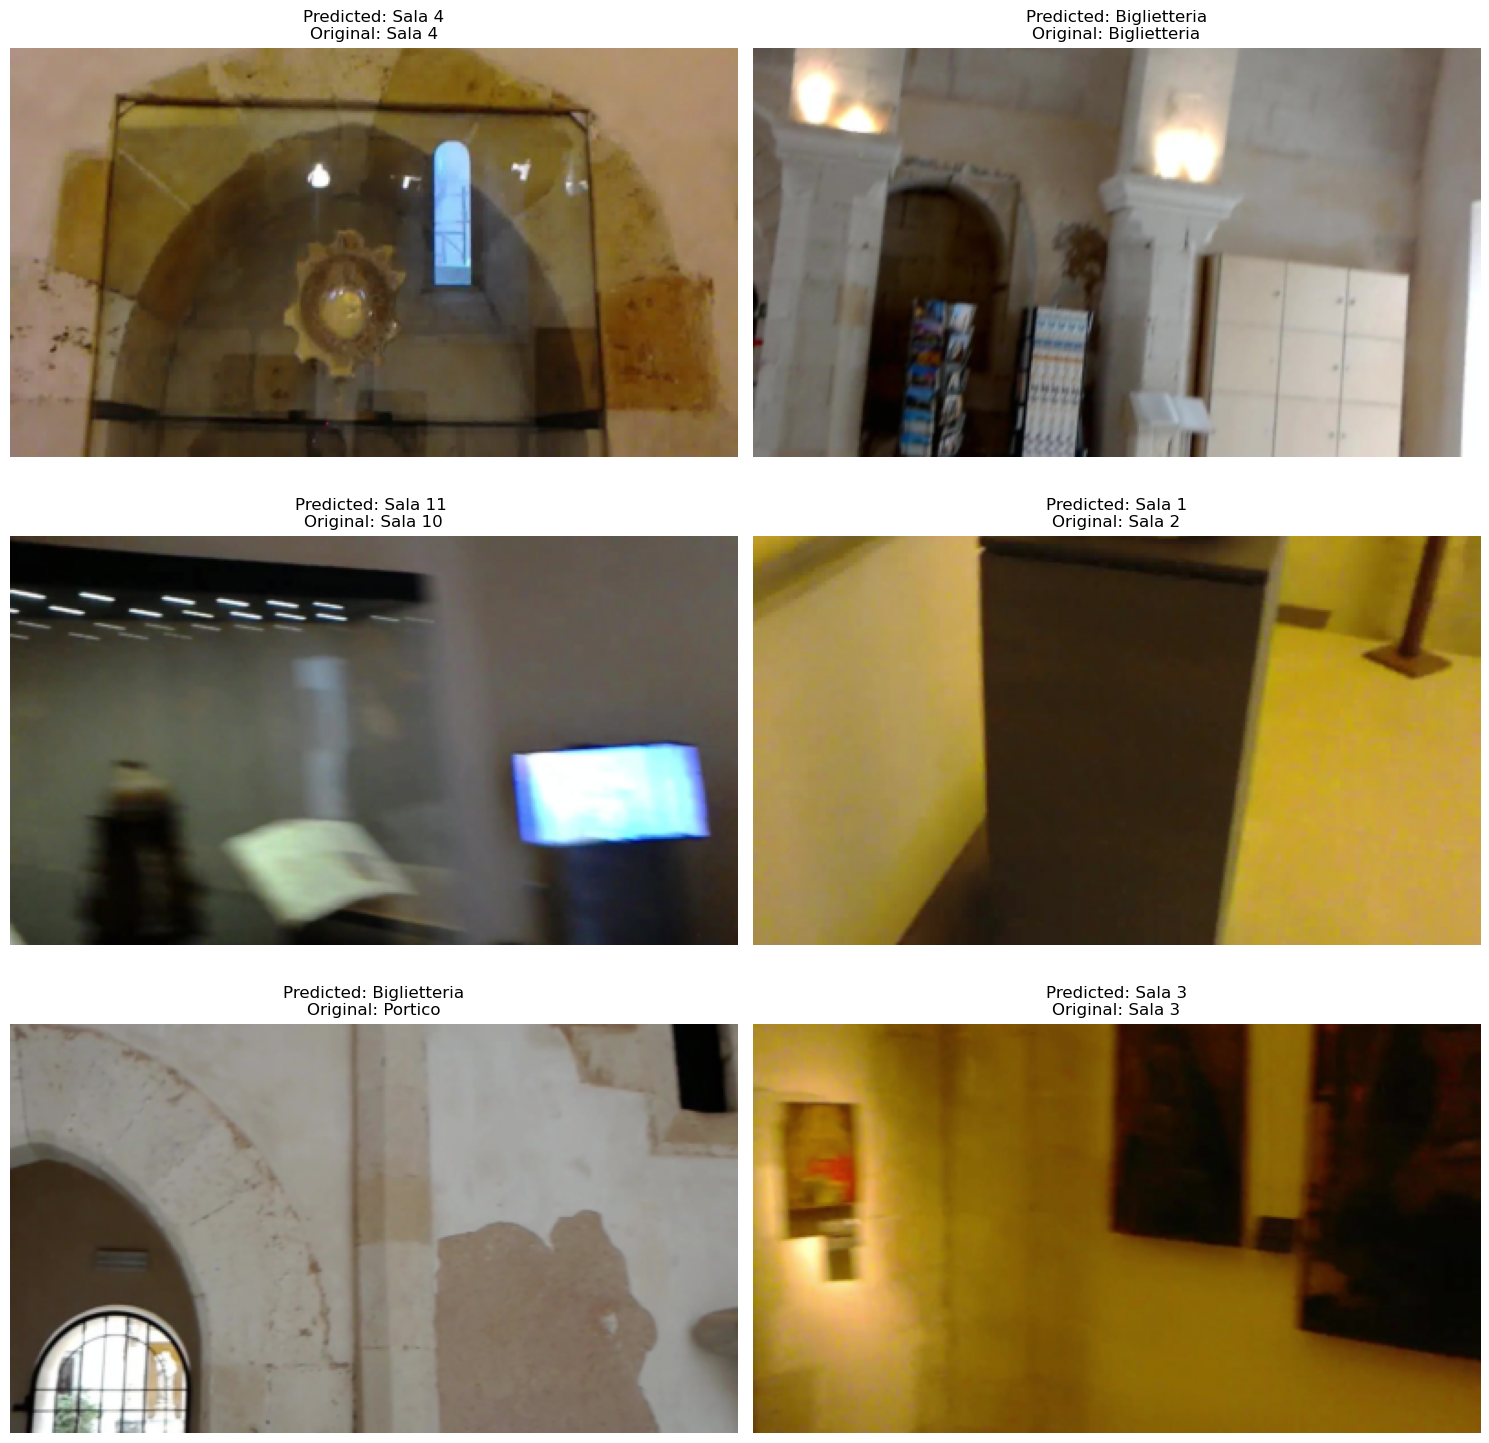

etichette corrette: 3


In [54]:
Demo(test_loader,6)